In [1]:
import numpy as np
import cv2
import os

# Function to load coordinates
def load_coord_nose(archivo):
    coordenadas = []
    with open(archivo, 'r') as f:
        next(f)
        next(f)
        for linea in f:
            datos = linea.split()
            coordenadas.append([datos[0],int(datos[5]),int(datos[6])]) #nose coords
    return coordenadas

def crop_nose(coordinates, tamaño=(25, 30)):
    nose_cropped = []
    j=0
    directorio_archivos = "/home/constanza/tfg/TFG/thesis/img_align_celeba"
    for coord in coordinates:
        if int(coord[0].split('.')[0])>= 182638:
            ruta_completa = os.path.join(directorio_archivos, coord[0])
            imagen_cara = cv2.imread(ruta_completa)
            x, y = coord[1], coord[2]
            nariz_recortada = imagen_cara[y - (tamaño[1]//4)*3:y + tamaño[1]//4, x - tamaño[0]//2:x + tamaño[0]//2]
            nose_cropped.append(nariz_recortada)
    return nose_cropped
def load_coordinates_eyes(file):
    coordinates = []
    with open(file, 'r') as f:
        next(f)
        next(f)
        for line in f:
            data = line.split()
            coordinates.append([data[0], int(data[1]), int(data[2]), int(data[3]), int(data[4])]) # Extracting nose coordinates
    return coordinates

def load_coord_nose_eyes(file):
    coordinates = []
    with open(file, 'r') as f:
        next(f)
        next(f)
        for line in f:
            data = line.split()
            coordinates.append([data[0],int(data[1]), int(data[2]), int(data[3]), int(data[4]), int(data[5]), int(data[6])])
    return coordinates
def crop_eyes(coordinates, size=(18, 12)):
    cropped_lefteyes = []
    cropped_righteyes = []
    j=0
    directory_files = "/home/constanza/tfg/TFG/thesis/img_align_celeba"
    for coord in coordinates:
        if int(coord[0].split('.')[0])>= 182638:
            full_path = os.path.join(directory_files, coord[0])
            face_image = cv2.imread(full_path)
            le_x, le_y, re_x, re_y = coord[1], coord[2],coord[3], coord[4]             
            cropped_lefteye = face_image[le_y - size[1]//2:le_y + size[1]//2, le_x - size[0]//2:le_x + size[0]//2]
            cropped_lefteyes.append(cropped_lefteye)
            cropped_righteye = face_image[re_y - size[1]//2:re_y + size[1]//2, re_x - size[0]//2:re_x + size[0]//2]
            cropped_righteyes.append(cropped_righteye)
    return (cropped_lefteyes, cropped_righteyes)


In [2]:
archivo = "list_landmarks_align_celeba.txt"
coord_nose = load_coord_nose(archivo)
croped_nose = crop_nose(coord_nose)
media = np.mean(croped_nose, axis=0)
media_uint8 = media.astype(np.uint8)
coord_eyes = load_coordinates_eyes(archivo)
cropped_lefteyes, cropped_righteyes = crop_eyes(coord_eyes)
mean_le = np.mean(cropped_lefteyes, axis=0)
mean_re = np.mean(cropped_righteyes, axis=0)
mean_le_uint8 = mean_le.astype(np.uint8)
mean_re_uint8 = mean_re.astype(np.uint8)


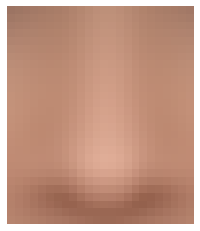

In [3]:
import matplotlib.pyplot as plt
imagen_rgb = cv2.cvtColor(media_uint8, cv2.COLOR_BGR2RGB)
plt.imshow(imagen_rgb.astype(np.uint8))
plt.axis('off')  
plt.show()

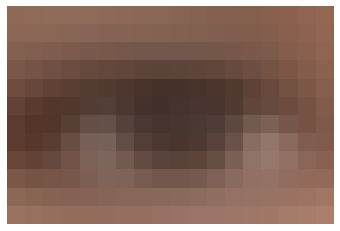

In [4]:
import matplotlib.pyplot as plt
imagen_rgb = cv2.cvtColor(mean_le_uint8, cv2.COLOR_BGR2RGB)
plt.imshow(imagen_rgb.astype(np.uint8))
plt.axis('off')  
plt.show()

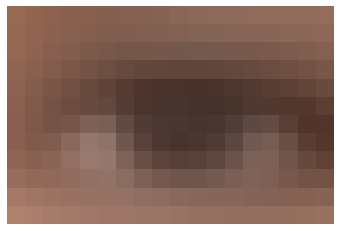

In [5]:
imagen_rgb = cv2.cvtColor(mean_re_uint8, cv2.COLOR_BGR2RGB)
plt.imshow(imagen_rgb.astype(np.uint8))
plt.axis('off')  
plt.show()

In [7]:
import csv
#you must comment or uncomment certain lines in order to change the features just in male or females
def replace_nose_eyes_delta(coordinates, delta, gamma, size_nose=(25, 30), size_eyes=(18, 12)):
    narices_recortadas = []
    j=0
    directorio_archivos = "/home/constanza/tfg/TFG/thesis/img_align_celeba"
    salida_directorio = "/home/constanza/tfg/TFG/thesis/eyes_nose"
    with open('celeba-att-male-test.csv', 'r') as archivo:
        lineas = csv.reader(archivo)
        img_list = []
        next(lineas)
        for linea in lineas:
            img_id =linea[0]
            img_list.append(img_id)
    with open('celeba-att-female-test.csv', 'r') as archivo:
        lineas = csv.reader(archivo)
        img_list_w = []
        next(lineas)
        for linea in lineas:
            img_id =linea[0]
            img_list_w.append(img_id)
    for coord in coordinates:
        img_id = coord[0] 
        if int(img_id.split('.')[0])>= 182638 and img_id in img_list:
            #we load the image
            ruta_completa = os.path.join(directorio_archivos, img_id)
            face_image = cv2.imread(ruta_completa)
            #we obtain the coordinates of the eyes and nose
            le_x, le_y, re_x, re_y, x_n, y_n= coord[1], coord[2],coord[3], coord[4], coord[5], coord[6]
            #we crop the nose and eyes of each image
            naz = face_image[y_n - (size_nose[1]//4)*3:y_n + size_nose[1]//4, x_n - size_nose[0]//2:x_n + size_nose[0]//2]
            cropped_lefteye = face_image[le_y - size_eyes[1]//2:le_y + size_eyes[1]//2, le_x - size_eyes[0]//2:le_x + size_eyes[0]//2]
            cropped_righteye = face_image[re_y - size_eyes[1]//2:re_y + size_eyes[1]//2, re_x - size_eyes[0]//2:re_x + size_eyes[0]//2]
            
            #avarage of nose and eyes
            #comment any of this three lines if you do or do not want to replace eyes or nose on male
            face_image[y_n - (size_nose[1]//4)*3:y_n + size_nose[1]//4, x_n - size_nose[0]//2:x_n + size_nose[0]//2] = media_uint8*delta + naz*(1-delta)
            face_image[le_y - size_eyes[1]//2:le_y + size_eyes[1]//2, le_x - size_eyes[0]//2:le_x + size_eyes[0]//2] = mean_le_uint8*gamma + cropped_lefteye*(1-gamma) 
            face_image[re_y - size_eyes[1]//2:re_y + size_eyes[1]//2, re_x - size_eyes[0]//2:re_x + size_eyes[0]//2] = mean_re_uint8*gamma + cropped_righteye*(1-gamma) 

            #write the image in the new folder
            imagen_rgb = cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB)
            ruta_salida = os.path.join(salida_directorio, img_id)
            cv2.imwrite(ruta_salida, face_image)
        elif int(img_id.split('.')[0])>= 182638 and img_id in img_list_w:
            ruta_completa = os.path.join(directorio_archivos, img_id)
            face_image = cv2.imread(ruta_completa)
            #we obtain the coordinates of the eyes and nose
            le_x, le_y, re_x, re_y, x_n, y_n= coord[1], coord[2],coord[3], coord[4], coord[5], coord[6]
            #we crop the nose and eyes of each image
            #naz = face_image[y_n - (size_nose[1]//4)*3:y_n + size_nose[1]//4, x_n - size_nose[0]//2:x_n + size_nose[0]//2]
            cropped_lefteye = face_image[le_y - size_eyes[1]//2:le_y + size_eyes[1]//2, le_x - size_eyes[0]//2:le_x + size_eyes[0]//2]
            cropped_righteye = face_image[re_y - size_eyes[1]//2:re_y + size_eyes[1]//2, re_x - size_eyes[0]//2:re_x + size_eyes[0]//2]
            
            #avarage of nose and eyes
            #comment any of this three lines if you do or do not want to replace eyes or nose on female
            #face_image[y_n - (size_nose[1]//4)*3:y_n + size_nose[1]//4, x_n - size_nose[0]//2:x_n + size_nose[0]//2] = media_uint8*(delta) + naz*(1-delta)
            face_image[le_y - size_eyes[1]//2:le_y + size_eyes[1]//2, le_x - size_eyes[0]//2:le_x + size_eyes[0]//2] = mean_le_uint8*(gamma) + cropped_lefteye*(1-gamma) 
            face_image[re_y - size_eyes[1]//2:re_y + size_eyes[1]//2, re_x - size_eyes[0]//2:re_x + size_eyes[0]//2] = mean_re_uint8*(gamma) + cropped_righteye*(1-gamma) 

            imagen_rgb = cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB)
            ruta_salida = os.path.join(salida_directorio, img_id)
            cv2.imwrite(ruta_salida, face_image)

In [8]:
cord = load_coord_nose_eyes(archivo)
#delta parameter controls the nose and gamma the eyes
replace_nose_eyes_delta(cord, 1,0.5)

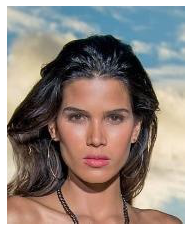

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/home/constanza/tfg/TFG/thesis/eyes_nose/182692.jpg')
plt.imshow(img)
plt.axis('off') 
plt.show()